In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bisect
import scipy.fftpack
sns.set(style='ticks', palette='Set2')

In [6]:
def simulation(alpha_1, alpha_2, alpha_3, gamma_1, gamma_2, gamma_3, n, K, X, Y, Z, max_steps):
    
    time_counts = []
    X_counts = []
    Y_counts = []
    Z_counts = []
    current_time = 0
    current_step = 0
    
    while current_step < max_steps:
        
        X_birth_rate = alpha_1 * (K**n / (K**n  + Z**n))
        X_death_rate = gamma_1 * X
        Y_birth_rate = alpha_2 * X
        Y_death_rate = gamma_2 * Y
        Z_birth_rate = alpha_3 * Y
        Z_death_rate = gamma_3 * Z

        cum_sum_rates = np.cumsum([X_birth_rate, X_death_rate, 
                                   Y_birth_rate, Y_death_rate, 
                                   Z_birth_rate, Z_death_rate])

        current_time += -np.log(np.random.rand()) / cum_sum_rates[-1]
        draw_prob = np.random.rand() * cum_sum_rates[-1]
        reaction_index = bisect.bisect_right(cum_sum_rates, draw_prob)

        if reaction_index == 0:
            X += 1
        elif reaction_index == 1:
            X -= 1
        elif reaction_index == 2:
            Y += 1
        elif reaction_index == 3:
            Y -= 1
        elif reaction_index == 4:
            Z += 1
        else:
            Z -= 1
            
        time_counts.append(current_time)
        X_counts.append(X)
        Y_counts.append(Y)
        Z_counts.append(Z)
        
        current_step += 1
            
    return time_counts, X_counts, Y_counts, Z_counts

In [443]:
alpha_1 = 5
alpha_2 = 5
alpha_3 = 5
gamma_1 = 0.5
gamma_2 = 0.5
gamma_3 = 0.5
n = 10
K = 1
X = 0
Y = 0
Z = 0
max_steps = 7000

In [444]:
time_counts, X_counts, Y_counts, Z_counts = simulation(alpha_1, alpha_2, alpha_3, 
                                                       gamma_1, gamma_2, gamma_3, 
                                                       n, K, X, Y, Z, max_steps)

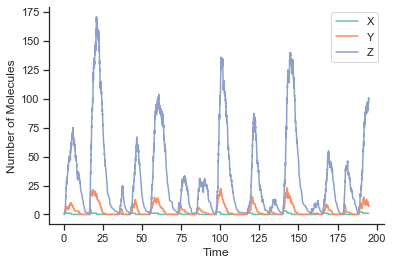

In [445]:
plt.plot(time_counts, X_counts, label='X')
plt.plot(time_counts, Y_counts, label='Y')
plt.plot(time_counts, Z_counts, label='Z')
plt.xlabel('Time')
plt.ylabel('Number of Molecules')
plt.legend()
sns.despine()

In [7]:
alpha_1 = 5
alpha_2 = 5
alpha_3 = 5
gamma_1 = 0.5
gamma_2 = 0.5
gamma_3 = 0.5
K = 1
X = 0
Y = 0
Z = 0
max_steps = 7000
total_sims = 1
n_params = [3, 5, 7, 10, 12]

Param n = 3
Param n = 5
Param n = 7
Param n = 10
Param n = 12


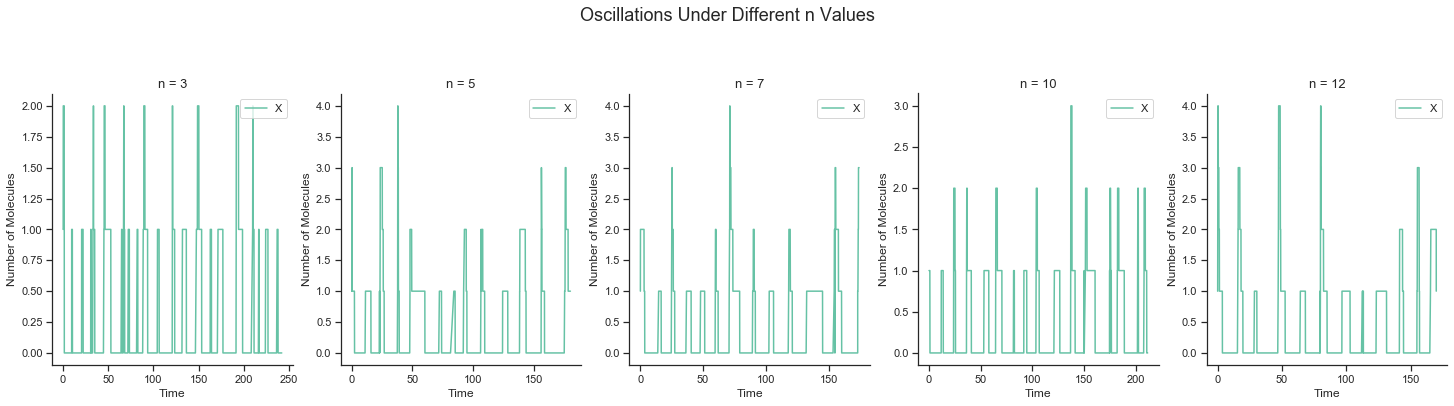

In [9]:
fig, ax = plt.subplots(1, 5, figsize=(25,5))
fig.suptitle('Oscillations Under Different n Values', fontsize=18, y=1.12)
for i, n in enumerate(n_params):
    time_arr = []
    X_arr = []
    Y_arr = []
    Z_arr = []
    print("Param n =", n)
    for _ in range(total_sims):
        time_counts, X_counts, Y_counts, Z_counts = simulation(alpha_1, alpha_2, alpha_3, 
                                                           gamma_1, gamma_2, gamma_3, 
                                                           n, K, X, Y, Z, max_steps)
        time_arr.append(time_counts)
        X_arr.append(X_counts)
        Y_arr.append(Y_counts)
        Z_arr.append(Z_counts)
        
    ax[i].plot(np.mean(time_arr, axis=0), np.mean(X_arr, axis=0), label='X')
    #ax[i].plot(np.mean(time_arr, axis=0), np.mean(Y_arr, axis=0), label='Y')
    #ax[i].plot(np.mean(time_arr, axis=0), np.mean(Z_arr, axis=0), label='Z')
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('Number of Molecules')
    ax[i].legend()
    ax[i].set_title('n = {0}'.format(n), fontsize=13)
    sns.despine()

In [534]:
alpha_1 = 5
alpha_2 = 5
alpha_3 = 5
gamma_1 = 0.5
gamma_2 = 0.5
gamma_3 = 0.5
n = 5
K = 1
X = 0
Y = 0
Z = 0
max_steps = 7000
time_counts, X_counts, Y_counts, Z_counts = simulation(alpha_1, alpha_2, alpha_3, 
                                                       gamma_1, gamma_2, gamma_3, 
                                                       n, K, X, Y, Z, max_steps)

In [535]:
X_fft = scipy.fftpack.fft(X_counts) 
X_psd = np.abs(X_fft) ** 2
fftfreq = scipy.fftpack.fftfreq(len(X_psd))
indices = fftfreq > 0

X_fft = scipy.fftpack.fft(X_counts) 
X_psd = np.abs(X_fft) ** 2
fftfreq = scipy.fftpack.fftfreq(len(X_psd))
indices = fftfreq > 0

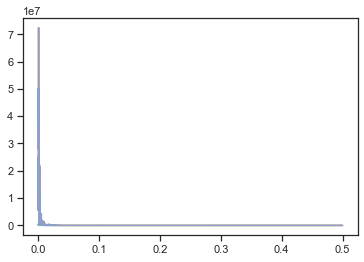

In [546]:
X_fft = scipy.fftpack.fft(X_counts) 
X_psd = np.abs(X_fft) ** 2
fftfreq = scipy.fftpack.fftfreq(len(X_psd))
indices = fftfreq > 0

plt.plot(fftfreq[indices], X_psd[indices])

Y_fft = scipy.fftpack.fft(Y_counts) 
Y_psd = np.abs(Y_fft) ** 2
fftfreq = scipy.fftpack.fftfreq(len(Y_psd))
indices = fftfreq > 0

plt.plot(fftfreq[indices], Y_psd[indices])

Z_fft = scipy.fftpack.fft(Z_counts) 
Z_psd = np.abs(Z_fft) ** 2
fftfreq = scipy.fftpack.fftfreq(len(Z_psd))
indices = fftfreq > 0

plt.plot(fftfreq[indices], Y_psd[indices])

In [547]:
alpha_1 = 5
alpha_2 = 5
alpha_3 = 5
gamma_1 = 0.5
gamma_2 = 0.5
gamma_3 = 0.5
K = 1
X = 0
Y = 0
Z = 0
max_steps = 7000
total_sims = 100
n_params = [3, 5, 7, 10, 12]

Param n = 3
Param n = 5
Param n = 7
Param n = 10
Param n = 12


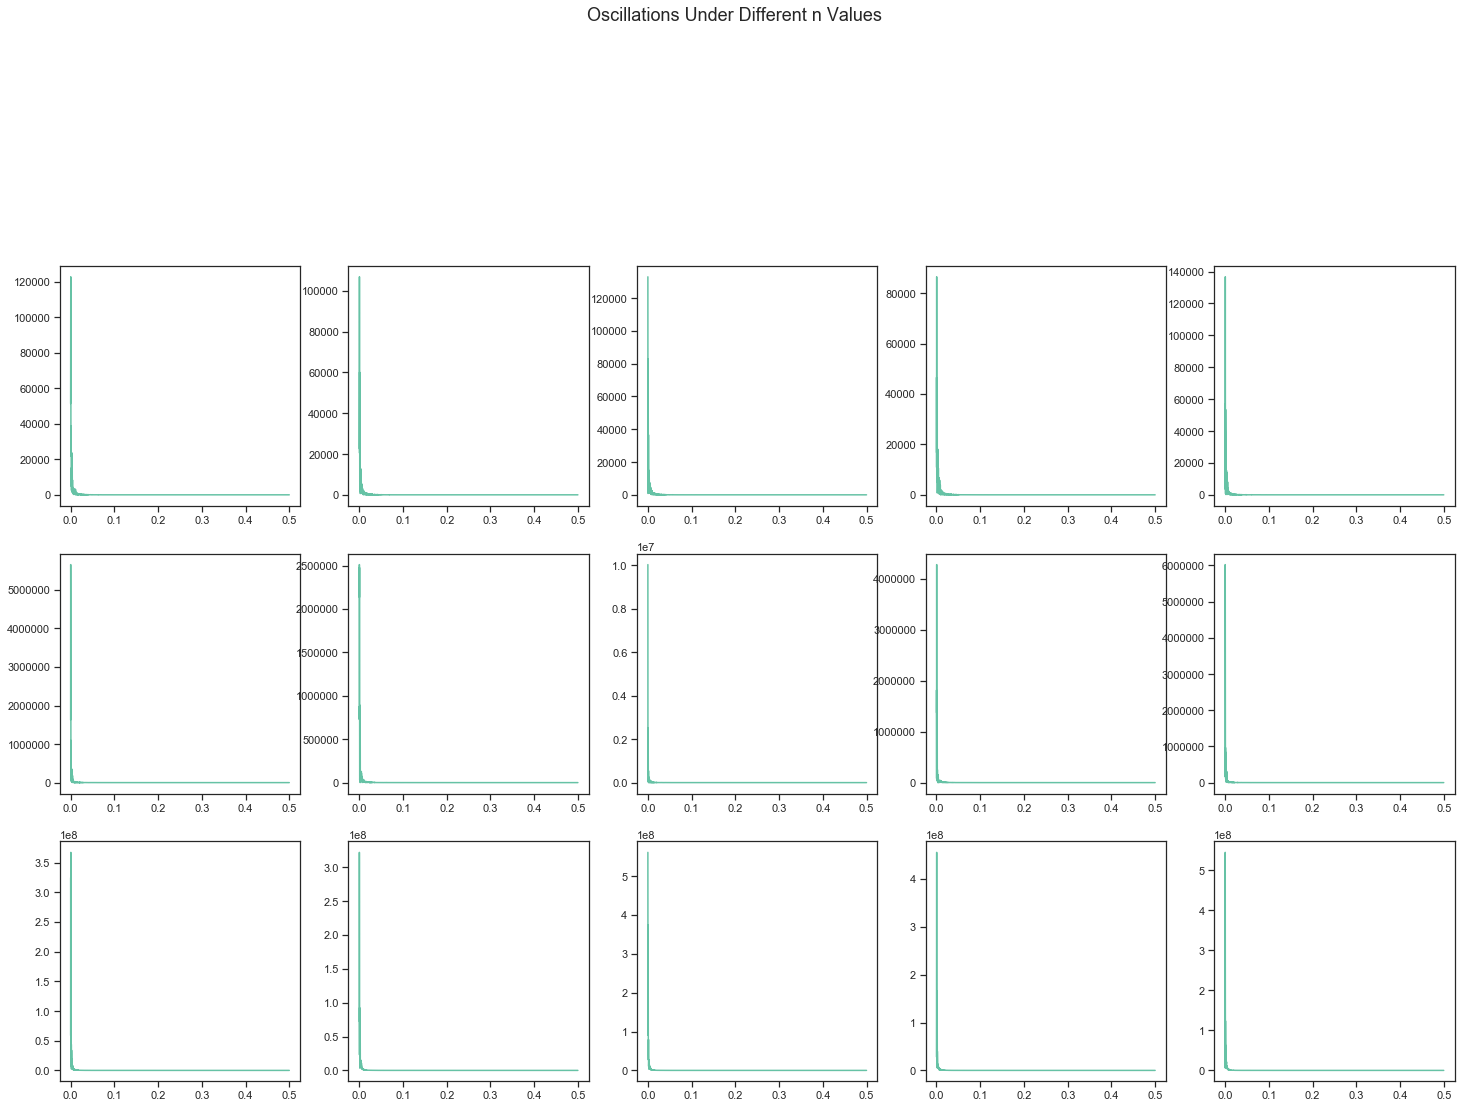

In [550]:
fig, ax = plt.subplots(3, 5, figsize=(25,15))
fig.suptitle('Oscillations Under Different n Values', fontsize=18, y=1.12)
for i, n in enumerate(n_params):
    time_arr = []
    X_arr = []
    Y_arr = []
    Z_arr = []
    print("Param n =", n)
    for _ in range(total_sims):
        time_counts, X_counts, Y_counts, Z_counts = simulation(alpha_1, alpha_2, alpha_3, 
                                                           gamma_1, gamma_2, gamma_3, 
                                                           n, K, X, Y, Z, max_steps)
        time_arr.append(time_counts)
        X_arr.append(X_counts)
        Y_arr.append(Y_counts)
        Z_arr.append(Z_counts)
        
    X_fft = scipy.fftpack.fft(np.mean(X_arr, axis=0)) 
    X_psd = np.abs(X_fft) ** 2
    fftfreq = scipy.fftpack.fftfreq(len(X_psd))
    indices = fftfreq > 0
        
    ax[0, i].plot(fftfreq[indices], X_psd[indices], label='X')
    
    Y_fft = scipy.fftpack.fft(np.mean(Y_arr, axis=0)) 
    Y_psd = np.abs(Y_fft) ** 2
    fftfreq = scipy.fftpack.fftfreq(len(Y_psd))
    indices = fftfreq > 0
    
    ax[1, i].plot(fftfreq[indices], Y_psd[indices], label='Y')
    
    Z_fft = scipy.fftpack.fft(np.mean(Z_arr, axis=0)) 
    Z_psd = np.abs(Z_fft) ** 2
    fftfreq = scipy.fftpack.fftfreq(len(Z_psd))
    indices = fftfreq > 0
    
    ax[2, i].plot(fftfreq[indices], Z_psd[indices], label='Z')
    
    p
    
    '''ax[i].set_xlabel('Time')
    ax[i].set_ylabel('Number of Molecules')
    ax[i].legend()
    ax[i].set_title('n = {0}'.format(n), fontsize=13)
    sns.despine()'''